<a href="https://colab.research.google.com/github/razon1494/ML-Practices/blob/main/Module_21_Gradient_Boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 21: Gradient Boosting
## Training, Implementation, Evaluation, and Overfitting Control

This notebook covers:
1. Gradient Boosting training, prediction, and key parameters
2. Implementing Gradient Boosting on a real dataset
3. Model evaluation, overfitting control, and practical use cases


## Section 1: Gradient Boosting Training, Prediction & Key Parameters

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

### Explanation
- NumPy and Pandas are used for numerical and tabular operations.
- Matplotlib is used for visual analysis.
- GradientBoostingRegressor is the core model used in this module.
- Mean Squared Error and R2 Score are used for regression evaluation.

In [ ]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

try:
    # Attempt to fetch data using scikit-learn's built-in function
    data = fetch_california_housing(as_frame=True)
    X = data.data
    y = data.target
    print("California Housing data loaded using fetch_california_housing.")
except Exception as e:
    print(f"Could not fetch California Housing data directly: {e}. Trying alternative download from CSV.")
    # Fallback to a direct CSV download from a common public source
    california_housing_url = "https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv"
    housing_df = pd.read_csv(california_housing_url)

    # Prepare X (features) and y (target) from the downloaded CSV
    X = housing_df.drop('median_house_value', axis=1)
    y = housing_df['median_house_value']

    # Handle potential missing values (e.g., 'total_bedrooms' in this dataset)
    # by filling with the median, a common practice.
    if X.isnull().sum().any():
        # Only calculate median for numeric columns to avoid TypeError on 'ocean_proximity'
        X = X.fillna(X.median(numeric_only=True))

    print("California Housing data loaded from alternative URL.")

X.head()

/usr/local/lib/python3.12/dist-packages/sklearn/datasets/_base.py:1519: UserWarning: Retry downloading from url: https://ndownloader.figshare.com/files/5976036
  warnings.warn(f"Retry downloading from url: {remote.url}")


Could not fetch California Housing data directly: HTTP Error 403: Forbidden. Trying alternative download from CSV.
California Housing data loaded from alternative URL.


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY


In [ ]:
y.head()

,median_house_value
0,452600.0
1,358500.0
2,352100.0
3,341300.0
4,342200.0


### Explanation
- California Housing is a real-world dataset with non-linear relationships.
- X contains input features.
- y is the target variable (median house value).
- Always inspect data before modeling.

In [ ]:
# Perform one-hot encoding on the 'ocean_proximity' column
X = pd.get_dummies(X, columns=['ocean_proximity'], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

### Explanation
- 80% of data is used for training.
- 20% is reserved for testing.
- Random state ensures reproducibility.
- Boosting models are sensitive to overfitting, so clean separation matters.

In [ ]:
#Model Declaration
gbr = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [ ]:
pred = gbr.predict(X_test)

### Explanation
- n_estimators controls how many boosting steps (trees) are used.
- learning_rate controls how much each tree contributes.
- max_depth keeps trees shallow to avoid overfitting.
- Gradient Boosting prefers many weak learners.

class sklearn.ensemble.GradientBoostingRegressor(*, loss='squared_error', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None, random_state=None, max_features=None, alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)

Details: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html#sklearn.ensemble.GradientBoostingRegressor


### Explanation
- Predictions are generated by summing all trees with shrinkage applied.
- At this stage, boosting iterations are complete.

## Section 2: Implementing Gradient Boosting on a Dataset

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(3123095111.877028, 0.7616701988665029)

### Explanation
- Mean Squared Error measures average squared prediction error.
- R2 Score measures how much variance is explained by the model.
- Higher R2 and lower MSE indicate better performance.

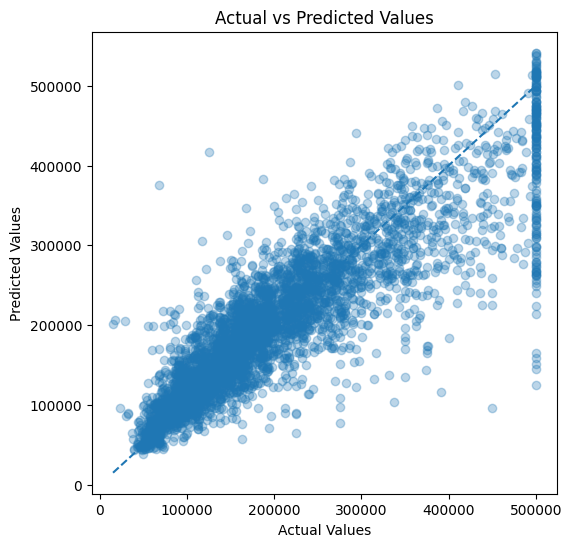

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()], linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

### Explanation
- Each point represents a prediction.
- The dashed line represents perfect prediction.
- Deviation from the line indicates prediction error.

## Section 3: Model Evaluation, Overfitting Control & Use Cases

###3.1 Understanding Overfitting in Gradient Boosting

Explain verbally before coding:

* Too many trees can overfit.

* Too large learning rate can overshoot.

* Deep trees learn noise.

###3.2 Effect of Learning Rate

In [ ]:
#Effect of Learning Rate
learning_rates = [0.01, 0.05, 0.1, 0.2, 0.8]
results = []

for lr in learning_rates:
  model = GradientBoostingRegressor(
      n_estimators=100,
      learning_rate=lr,
      max_depth = 3,
      random_state = 42

  )
  model.fit(X_train, y_train)
  preds = model.predict(X_test)
  results.append((lr, r2_score(y_test, preds)))

pd.DataFrame(results, columns=["Learning Rate", "R2 Score"])

,Learning Rate,R2 Score
0,0.01,0.507628
1,0.05,0.705390
2,0.10,0.761670
3,0.20,0.788948
4,0.80,0.793571


### Explanation
- Smaller learning rates require more trees.
- Larger learning rates may overfit.
- This demonstrates the bias-variance tradeoff.

###3.3 Effect of Tree Depth

In [ ]:
#Effect of Tree Depth
depths = [1,2,3,4,7]
results = []

for depth in depths:
  model = GradientBoostingRegressor(
      n_estimators=100,
      learning_rate=0.1,
      max_depth = depth,
      random_state = 42

  )
  model.fit(X_train, y_train)
  preds = model.predict(X_test)
  results.append((depth, r2_score(y_test, preds)))

pd.DataFrame(results, columns=["Max_Depth", "R2 Score"])

,Max_Depth,R2 Score
0,1,0.615500
1,2,0.712707
2,3,0.761670
3,4,0.791932
4,7,0.823634


###Explanation

* Shallow trees capture simple patterns.

* Deeper trees capture complex patterns but may overfit.

* Boosting works best with shallow trees.

###3.4 Feature Importance

In [ ]:
feature_importance = gbr.feature_importances_

importance_df = pd.Series(
    feature_importance, index=X.columns
).sort_values(ascending=False)

importance_df.head(10)

,0
median_income,0.588018
ocean_proximity_INLAND,0.168416
longitude,0.086303
latitude,0.048448
housing_median_age,0.041398
population,0.025039
total_bedrooms,0.021696
ocean_proximity_NEAR OCEAN,0.006269
households,0.006032
ocean_proximity_NEAR BAY,0.005186


###Explanation

- Gradient Boosting can provide feature importance.

- Higher importance means the feature was used more in splits.

- This helps interpret the model.

### 3.5 Practical Use Cases

Gradient Boosting is widely used in:

- Credit risk and loan default prediction

- Fraud detection

- Medical risk scoring

- Demand forecasting

- Ranking systems

- Tabular Kaggle competitions

If the data is structured and performance matters, Gradient Boosting is often the first serious model to try.